In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## #1 Importing the dataset

In [93]:
#Importing the final dataframe
file = 'final_df.csv'
df = pd.read_csv(file)

#Removing unnecessary column 'Unnamed : 0'
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [94]:
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.156857  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  336.094350   
2     8.099124  224.236259  19909.541732     9.275884  330.449166   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  364.091541   
3273  9.419510  175.762646  33155.578218     7.350233  327.357588   
3274  5.126763  230.603758  11983.869376     6.303357  325.952434   
3275  7.874671  195.102299  17404.177061     7.509306  345.728295   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135         0.0  
1       592.885359       15.180013        56.329076   4.500656         0.0  
2       418.606213       16.868637        66.420093   3.055934         0.0  
3       363.266516       18.436524       100.341674   4.628771         0.0  
4       398.410813       11.558279        31.997993   4.075075         0.0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821         1.0  
3272    392.449580       19.903225        64.327280   2.798243         1.0  
3273    432.044783       11.039070        69.845400   3.298875         1.0  
3274    402.883113       11.168946        77.488213   4.708658         1.0  
3275    327.459760       16.140368        78.698446   2.309149         1.0  

[3276 rows x 10 columns]

**Because there are no categorical features, there is no need to create dummy features.**

___

## #2 Creating the train/test split and scaling the data for the model 

Since the target feature 'Potability' is a binary classifier, we will not need to scale it. However, we will need to scale everything else. I'm going to start with a Standard Scaler.

In [95]:
#Importing the StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [96]:
#Seperating the target feature from the other features
X = df.drop('Potability', axis = 1).copy()

y = df['Potability'].copy()

In [97]:
#Performing the train/test split with a test size of 25%
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y, test_size = .25)

In [98]:
#Instantiating the Standard Scaler
scaler = StandardScaler()

In [99]:
#Scaling the X_train data
X_train = scaler.fit_transform(X_train_unscaled)

In [100]:
#Scaling the X_test data
X_test = scaler.transform(X_test_unscaled)

___

## #3 Saving the train/test split for modeling

In [101]:
#Saving the X_train_scaled data
pd.DataFrame(X_train).to_csv('X_train.csv')

In [102]:
X_train

array([[ 0.26275869,  0.57623844,  1.0433154 , ..., -0.63230921,
        -0.80732629,  0.05316276],
       [ 0.10715174, -0.25552324, -0.14327174, ...,  0.61985333,
         0.32062958,  0.63006728],
       [ 1.01146263,  0.97861837,  1.23056532, ...,  0.85124312,
        -0.49706845, -0.34853995],
       ...,
       [-1.58903683,  0.39134227, -0.23462361, ..., -0.08068034,
         1.4680233 , -0.06470528],
       [ 0.1934521 ,  0.50246027, -0.05158348, ..., -0.7503076 ,
        -0.58853651, -0.93487823],
       [-2.13003708,  1.12219644,  1.13222732, ..., -1.39247617,
        -0.18127397, -0.09087694]])

In [103]:
#Saving the X_test_scaled data
pd.DataFrame(X_test).to_csv('X_test.csv')

In [104]:
X_test

array([[ 0.04250724,  0.00316484, -0.59227614, ..., -0.43179537,
         0.01423443,  0.06618442],
       [-0.48738317, -0.96715976, -0.52125906, ...,  0.31126457,
        -1.2457837 , -0.71378504],
       [-1.12838054, -1.69249592, -0.55204462, ..., -0.91147566,
        -0.61487529,  1.08745118],
       ...,
       [-0.33753776,  0.73256093,  0.62549081, ..., -0.84727895,
        -0.83283996,  1.00010278],
       [ 1.69554488, -3.08459972, -0.62766667, ..., -0.59456713,
         0.05324417,  0.05423039],
       [-0.25086577,  0.91032097, -1.57408434, ..., -0.72772217,
        -0.936787  ,  0.12833411]])

In [105]:
#Saving the y_train data
pd.DataFrame(y_train).to_csv('y_train.csv')

In [106]:
y_train

1352    0.0
2320    1.0
2789    1.0
3020    0.0
957     0.0
       ... 
2965    0.0
1418    0.0
956     0.0
1116    1.0
60      0.0
Name: Potability, Length: 2457, dtype: float64

In [107]:
#Saving the y_test data
pd.DataFrame(y_test).to_csv('y_test.csv')

In [108]:
y_test

395     1.0
1697    0.0
24      0.0
344     1.0
697     1.0
       ... 
1264    0.0
2588    0.0
3080    0.0
3179    1.0
2506    0.0
Name: Potability, Length: 819, dtype: float64

___

## #4 Creating a Random Forest Model

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import 

In [133]:
#Hyperparameters to manipulate

#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]

#Maximum number of levels in tree
max_depth = [2, 4]

#Minimum number of samples required to split a node
min_samples_split = [2, 5]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

#Method of selecting samples for training each tree
bootstrap = [True, False]

In [134]:
#Create the param grid
param_grid = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'bootstrap': bootstrap}

print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [135]:
rf_Model = RandomForestClassifier()
rf_Model.fit(X_train, y_train)

RandomForestClassifier()

In [136]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(rf_Model, param_grid = param_grid, cv = 10)

In [137]:
rf_Grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]})

In [138]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 72}

In [139]:
#Results of the Random Forest Classifier 
print(f'Train Accuracy - : {rf_Grid.score(X_train, y_train):.3f}')
print(f'Test Accuracy - : {rf_Grid.score(X_test, y_test):.3f}')

Train Accuracy - : 0.656
Test Accuracy - : 0.658


In [140]:
#Comparing against the generic Random Forest Classifier model
print(f'Train Accuracy - : {rf_Model.score(X_train, y_train):.3f}')
print(f'Test Accuracy - : {rf_Model.score(X_test, y_test):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 0.683


In [141]:
y_pred = rf_Grid.predict(X_test)

In [142]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[506,  15],
       [265,  33]])

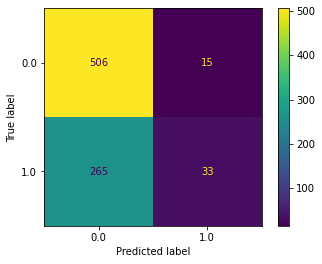

In [143]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_Grid, X_test, y_test)

In [144]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.66      0.97      0.78       521
         1.0       0.69      0.11      0.19       298

    accuracy                           0.66       819
   macro avg       0.67      0.54      0.49       819
weighted avg       0.67      0.66      0.57       819

